In [41]:
import sqlite3
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.tools import eval_measures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats %matplotlib inline

In [32]:
# load in merged_citylevel_data
file = "../data/csv/merged_citylevel_data.csv"
merged_df = pd.read_csv(file)
merged_df
# for col in merged_df.columns:
#     print(col)

,city,percent_millenial,total_population,per_cap_consumption,per_cap_dollar_sales,units_current_year,dollars_current_year,asp_current_year,year
0,Albany,22.0,"97,726",56.464359,77.465250,5.518036e+06,7.570369e+06,1.383631,2017
1,Atlanta,26.0,"491,763",57.869124,73.631820,2.845789e+07,3.620940e+07,1.284721,2017
2,Baltimore/Washington,23.0,"693,972",64.454312,94.508561,4.472949e+07,6.558630e+07,1.469946,2017
3,Boise,26.0,"227,621",19.203173,26.754134,4.371045e+06,6.089803e+06,1.400174,2017
4,Boston,23.0,688276,44.897423,67.174874,3.090182e+07,4.623485e+07,1.503295,2017
5,Buffalo/Rochester,26.1,"206,483",41.017719,58.333023,8.469462e+06,1.204478e+07,1.416024,2017
6,Charlotte,25.0,"859,347",14.553037,20.668500,1.250611e+07,1.776141e+07,1.429049,2017
7,Chicago,24.0,2713000,15.943954,24.600782,4.325595e+07,6.674192e+07,1.586561,2017
8,Cincinnati/Dayton,26.0,"301,648",44.899463,61.883576,1.354383e+07,1.866706e+07,1.398234,2017
9,Columbus,29.0,"881,763",11.384823,13.783786,1.003872e+07,1.215403e+07,1.229467,2017


In [33]:
# merged_df.plot.bar(x='city', y='percent_millenial')
# merged_df.plot.bar(x='city', y='per_cap_consumption')

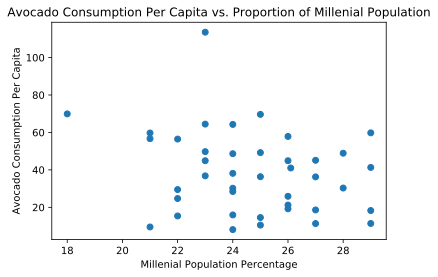

In [34]:
# remove outliers
# outliers = ["Harrisburg/Scranton", "Miami/FT. Lauderdale"]
# merged_df = merged_df[~merged_df['city'].isin(outliers)]
# merged_df

millenial_percent = merged_df['percent_millenial']
avo_cap = merged_df['per_cap_consumption']
plt.scatter(millenial_percent, avo_cap)
plt.title("Avocado Consumption Per Capita vs. Proportion of Millenial Population")
plt.xlabel("Millenial Population Percentage")
plt.ylabel("Avocado Consumption Per Capita")
plt.show()

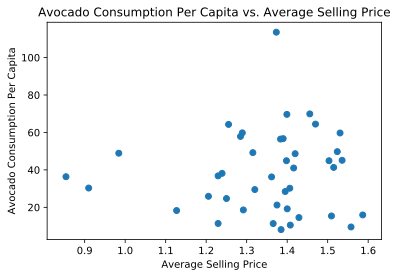

In [35]:
price = merged_df['asp_current_year']
avo_cap = merged_df['per_cap_consumption']
plt.scatter(price, avo_cap)
plt.title("Avocado Consumption Per Capita vs. Average Selling Price")
plt.xlabel("Average Selling Price")
plt.ylabel("Avocado Consumption Per Capita")
plt.show()

In [36]:
# X = merged_df[['percent_millenial']]
# X = merged_df[['percent_millenial', 'asp_current_year']]
merged_df['percent_millenial_sq'] = merged_df['percent_millenial'] ** 2
X = merged_df[['percent_millenial', 'asp_current_year']]
y = merged_df['per_cap_consumption']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     per_cap_consumption   R-squared:                       0.068
Model:                             OLS   Adj. R-squared:                  0.019
Method:                  Least Squares   F-statistic:                     1.394
Date:                 Wed, 06 May 2020   Prob (F-statistic):              0.261
Time:                         21:37:58   Log-Likelihood:                -182.83
No. Observations:                   41   AIC:                             371.7
Df Residuals:                       38   BIC:                             376.8
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               110.6269

In [37]:
file = "../data/csv/merged_regionlevel_data.csv"
regionmerged_df = pd.read_csv(file)
regionmerged_df

,region,year,pctg_millenial,millenial_pop,boomer_pop,total_avo_sold,total_population,per_cap_avo,total_sales,avg_unit_price
0,California,2016,23.510470,9181203,20309605,2.952701e+08,39051551,7.561033,337515906.2,1.170295
1,California,2017,23.454263,9203129,20537248,2.892980e+08,39238620,7.372788,380606199.6,1.343624
2,California,2018,23.365452,9206218,20748737,3.449431e+08,39400984,8.754682,396510003.6,1.159590
3,Great Lakes,2016,21.275327,9950923,25574041,1.710266e+08,46772128,3.656593,206192234.5,1.230583
4,Great Lakes,2017,21.260386,9956720,25697271,1.767339e+08,46832264,3.773763,245531991.9,1.416933
5,Great Lakes,2018,21.249925,9963194,25818816,2.205796e+08,46885784,4.704617,252818526.0,1.150933
6,Midsouth,2016,21.164907,8070600,20971594,1.567756e+08,38131989,4.111393,186860739.4,1.211812
7,Midsouth,2017,21.139782,8119174,21189513,1.626263e+08,38407084,4.234279,220656604.8,1.364645
8,Midsouth,2018,21.096173,8157019,21409723,2.020955e+08,38665871,5.226716,237072632.0,1.176025
9,Northeast,2016,21.719980,12311019,31681670,2.220152e+08,56680619,3.916951,284140841.2,1.308634


In [38]:
yr_16_df = regionmerged_df[regionmerged_df["year"]==2016]
yr_17_df = regionmerged_df[regionmerged_df["year"]==2017]
yr_18_df = regionmerged_df[regionmerged_df["year"]==2018]

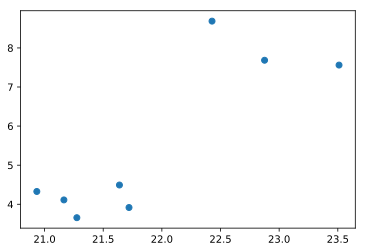

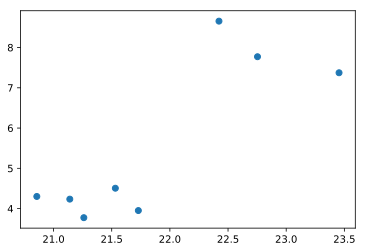

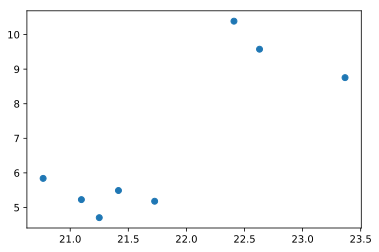

In [39]:
plt.scatter(x=yr_16_df["pctg_millenial"], y=yr_16_df["per_cap_avo"])
plt.show()
plt.scatter(x=yr_17_df["pctg_millenial"], y=yr_17_df["per_cap_avo"])
plt.show()
plt.scatter(x=yr_18_df["pctg_millenial"], y=yr_18_df["per_cap_avo"])
plt.show()

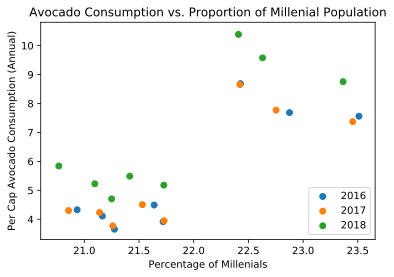

In [42]:
# plt.scatter(x=regionmerged_df["pctg_millenial"], y=regionmerged_df["per_cap_avo"], c=regionmerged_df["year"])
plt.scatter(x=yr_16_df["pctg_millenial"], y=yr_16_df["per_cap_avo"])
plt.scatter(x=yr_17_df["pctg_millenial"], y=yr_17_df["per_cap_avo"])
plt.scatter(x=yr_18_df["pctg_millenial"], y=yr_18_df["per_cap_avo"])
plt.title('Avocado Consumption vs. Proportion of Millenial Population')
plt.xlabel('Percentage of Millenials')
plt.ylabel('Per Cap Avocado Consumption (Annual)')
plt.legend(loc="lower right", labels=[2016, 2017, 2018])
plt.savefig("scatter_new", dpi=300)
plt.show()